# Frost Bite Sales Analysis

As the current Frost Bite Student Coordinator, a student-run ice cream shop on campus, I am curious about the sales of ice cream, the potential factors that affect people’s choice of visiting the shop, and what flavors to get. Since no formal data analysis has been done on these topics in the past, knowing these trends will help with the future planning of the shop and the decision-making process of daily operations. 

In this project, I use data including ice cream flavor and usage, customers count, temperature, and rain guage to examine relationships between those variables and answer the following research questions:
1.	How does the weather or temperature affect ice cream usage and the number of customers?\
A: Higher temperature increases the number of customers. No correlation is found between temperature and ice cream usage, rain and ice cream usage, or rain and number of customers.

2.	What ice cream flavors are the most popular?\
A: The 8 most popular flavors are: Chocolate Chip Cookie Dough, Salted Caramel Brownie Chocolate, Dawg Tracks, Cookies & Cream, Mint Chocolate Chip, Mocha Almond Fudge, Strawberry Cheesecake, and Huckleberry. The 8 least popular flavors are: Coconut Toasted Pineapple, Orange Sherbet, Vanilla Bean, Pistachio Almond, Caramel Butter Pecan, Wildberry, Ube, Rainbow Sherbet

3.	Is there a day of the week that we have the most customers?\
A: We have the most customers on Thursdays. In general, we have more customers on weekdays then weekends. 

4.	Does the existence of very popular flavors affect sales of other flavors?\
A: No.

## Challenge Goals
- Messy Data\
Even though the Frost Bite Daily Ice Cream Inventory Dataset is a csv file, data is recorded in 3*12 blocks every day. I had to turn the data into long format, replace missing or problematic values, seperate certain values in a box, and replace messy abbreviations used when recording. 

- Statistical Hypothesis Testing\
I conducted a t-test for temperature and customer count under the question "How does the weather or temperature affect ice cream usage and the number of customers?". My hypothesis was that the temperature has an effect on the number of customers we have. Before starting the project, I also hypothesized that the temperature and rain will have an effect on ice cream usage, and the rain will have an effect on customer count, but since there was no correlation between those pairs of vairables, I did not further conduct any hypothesis tests.\
For “Does the existence of very popular flavors affect sales of other flavors?”, I ran an ANOVA test to test its effect. My hypothesis was that the existence of a popular flavor decreases the sales of other flavors.

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [ ]:
your_name = "Yvonne Wang"
sources = [
    "1/13, 1/15, 1/17, 1/22, 1/24, 1/27, 1/29 lectures",
    "1/9, 1/16, 1/23, 1/30 sections",
    "pd iloc every 2 rows https://stackoverflow.com/questions/25055712/pandas-every-nth-row",
    "python 2d array to 1d - Google AI overview",
    "pd df drop nan from one column https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html",
    "str.contain Cannot mask with non-boolean array containing NA / NaN values https://stackoverflow.com/questions/66536221/getting-cannot-mask-with-non-boolean-array-containing-na-nan-values-but-the",
    "python string trim - Google AI overview",
    "pd if-else -> pd apply https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html",
    "python startswith - Google AI overview",
    "python or in contains https://stackoverflow.com/questions/57451640/how-can-i-use-the-or-operator-for-the-str-contains-funtion-when-searching-for-mu",
    "pd str to int ignore nan https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int",
    "python date to day of the week https://www.geeksforgeeks.org/python-program-to-find-day-of-the-week-for-a-given-date/",
    "pd df first row to header https://stackoverflow.com/questions/31328861/replacing-header-with-top-row",
    "datetime next date https://www.geeksforgeeks.org/python-find-yesterdays-todays-and-tomorrows-date/",
    "np where https://www.geeksforgeeks.org/numpy-where-in-python/",
    "python df add row https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/",
    "pd get one of the multiindex https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.get_level_values.html",
    "df merge https://pandas.pydata.org/docs/user_guide/merging.html",
    "pd groupby select top 8 https://www.geeksforgeeks.org/get-topmost-n-records-within-each-group-of-a-pandas-dataframe/",
    "python plt color https://matplotlib.org/stable/gallery/color/named_colors.html",
    "pd plot category order - Google AI overview, https://pandas.pydata.org/docs/user_guide/categorical.html",
    "anova test python - Google AI overview, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html",
    "python list contains anything in the other list - Google AI overview",
    "python t test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html"
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting and Methods

### Data Setting
1.	Frost Bite's daily ice cream inventory – recorded daily by Yvonne Wang and Christopher Tong (Frost Bite volunteer)
\
I first transformed daily inventory records that was in 3*12 blocks to long format, dropped the extra blocks that did not have any dates specified, and dropped the dates that we were not open. I then changed the dates into Datetime objects and seperated the records that have more than one flavor-usage pair in the block (flavors changed during the night). For the records with uncertainty (have two possible values), I chose the greater value for the purpose of this analysis. After that, I replaced the messy abbrevitions with proper names and removed unrelated records. For the dates with missing records, I divided the record for the next day in half since it would be counting the usage of two days. Lastly, I set the date and flavor columns as multiindex for the analysis later. 

2.	University of Washington Temperature/Dewpoint 
\
I first reset the columns of the dataset. I then changed the time column to datatime objects, selected the times within our opening time (6-9 PM), and calculated the mean temperature of each day. 

3.	University of Washington Rain Guage Tips
\
I first reset the columns of the dataset. I then changed the time column to datatime objects, selected the times within our opening time (6-9 PM), summed up the total amount of rain each night, and determined whether or not it rained that night (>0 = True).

4.	Frost Bite’s daily customer count – recorded daily by Frost Bite AU24 and WI25 volunteers. 
\
I changed the date column to datetime column, replaced the non-numbers with Nan, trainsformed the numbers to numeric, and dropped the problematic records (numbers under 10 that was caused by recording errors).

Link for 1 and 4: https://docs.google.com/spreadsheets/d/1ezvsTq-YAGvFBXMZbIcGwYaSmkpdswXIkSoLgUYA7DY/edit?usp=sharing 

Link for 2 and 3: https://www-k12.atmos.washington.edu/k12/grayskies/nw_weather.html 

After cleaning the four datasets, I merged the data needed together into a single dataframe.

### Methods

After cleaning the datasets, I did the following steps to answer the research questions:

To answer "How does the weather or temperature affect ice cream usage and the number of customers?":
1. Plot scatter plots and regression lines for temperature vs ice cream usage and temperature vs customer count. Calculate the Pearson r value.
2. Plot box plots for rain vs ice cream usage and rain vs customer count. Calculate the Spearman's rho value. 
3. For the results that show correlation, conduct appropriate hypothesis tests.

To answer "What ice cream flavors are the most popular?":
1. Plot bar plots for the 8 most and least popular flavors. 

To answer "Is there a day of the week that we have the most customers?":
1. Plot a bar plot based on average customer count grouped by day of the week. 

To answer "Does the existence of very popular flavors affect sales of other flavors?":
1. Define and select the "popular flavors".
2. Seperate the dataset into a group that contains popular flavors and a group that does not. 
3. Conduct ANOVA tests between those groups.

## Cleaning Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import doctest
from datetime import date, timedelta
from pandas.api.types import CategoricalDtype
import scipy.stats as stats

### Clean Daily Ice Cream Inventory Data

In [ ]:
#import ice cream inventory data
daily_inventory_df = pd.read_csv("data/CSE163_Daily_Inventory_Data.csv")

daily_inventory_df

,Sunday,left on shelf,amount decrease,Monday,left on shelf.1,amount decrease.1,Tuesday,left on shelf.2,amount decrease.2,Wednesday,...,amount decrease.3,Thursday,left on shelf.4,amount decrease.4,Friday,left on shelf.5,amount decrease.5,Saturday,left on shelf.6,amount decrease.6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11/1,left on shelf,amount decreased,11/2,left on shelf,amount decreased
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,brownie batter (mys),0.9,NaN,brownie batter (mys),0.7,0.2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,spumoni,0.6,NaN,vanilla bean; rainbow sorbet,0.7,0.3; 0.3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,tcp,0.4,NaN,spumoni,0.1,0.5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,huckle,1,NaN,tcp,0.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,cbp (mys),0,0.1,caf (mys),0.8,0.2,caf (mys),0.05,0.75,caf; strawcc,...,0.05; 0.6,straw ch; wild,1,0.4; 0,wild,0.9,0.1,NaN,NaN,NaN
163,straw,0.5,0.3,straw; rasp,1,0.5; 0,raspberry,0.5,0.5,raspberry,...,0.4,rasp,0.3,0.8,rasp,0,0.3,NaN,NaN,NaN
164,huckle,1,0.2,huckle,0.6,0.4,huckleberry,0.8,0.8,huckleberry,...,0.3,huckle,0.4,1.1,huckle,0.9,0.5,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def chunks_to_long(chunk_df):
    """
    This function takes in a inventory dataframe that has data in chunks and
    returns the transformed dataframe that has inventory data in  long format
    with columns data, flavor, and usage.
    """
    result_df = pd.DataFrame(columns=["date", "flavor", "usage"])

    for start_row in range(0, len(chunk_df), 12):
        for start_col in range(0, 20, 3):
            date = chunk_df.values[start_row, start_col]
            for i in range(1, 9):
                df_length = len(result_df)
                result_df.loc[df_length] = [date,
                                            chunk_df.iloc[start_row + i, start_col],
                                            chunk_df.iloc[start_row + i, start_col + 2]]
    return result_df

long_daily_inventory_df = chunks_to_long(daily_inventory_df)
long_daily_inventory_df

,date,flavor,usage
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
779,3/1,NaN,NaN
780,3/1,NaN,NaN
781,3/1,NaN,NaN
782,3/1,NaN,NaN


In [6]:
def add_year(ori_date):
    """
    This function takes in a string representation of dates with the format "mm/dd"
    and returns the string representation of dates with year added with the format
    "mm/dd/yyyy". It adds 2024 if it's November or December, and adds 2025 otherwise.
    >>> add_year("11/31")
    '11/31/2024'
    >>> add_year("2/29")
    '2/29/2025'
    """
    if ori_date.startswith(("11", "12")):
        ori_date += "/2024"
    else:
        ori_date += "/2025"
    return ori_date

In [7]:
def init_clean_long_inven_df(df, dates_to_drop):
    """
    This function takes in the dataframe to clean and a list of dates to drop. It
    drops the NaN values in the date column, change the format of the dates to
    "mm/dd/yyyy" and datetime format, cleans data that contains ";" by splitting
    the values into two cells, and cleans data that contains "/" or "v" by selecting
    the later value. It returns the cleaned dataframe.
    """
    # drop NaN
    df = df.dropna(subset=["date"])

    # drop sepcific dates
    drop_specifics_data = df[df["date"].isin(dates_to_drop)].index
    df = df.drop(drop_specifics_data)

    # change to dates
    df["date"] = df["date"].apply(add_year)
    df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")

    # clean the data that exists ";"
    flavor_change_index = df.loc[df['flavor'].str.contains(";", na=False)].index

    for index in flavor_change_index:
        # get the two flavors/usages to a list
        date = df.loc[index, "date"]
        two_flavors = df.loc[index, "flavor"].split(";")
        two_usages = df.loc[index, "usage"].split(";")

        # modify curr cell to the first flavor and usage
        df.at[index, "flavor"] = two_flavors[0]
        df.at[index, "usage"] = two_usages[0]

        # add new row for the second flavor
        df_length = len(df)
        df.loc[df_length] = [date, two_flavors[1].strip(), two_usages[1].strip()]

    # remove "v" or "/" in usage, use the later one
    usage_change_index = df.loc[df['usage'].str.contains(("v|/"), na=False)].index

    for index in usage_change_index:
        df.loc[index, "usage"] = df.loc[index, "usage"].replace("v", "/")
        df.at[index, "usage"] = df.loc[index, "usage"].split("/")[-1]

    return df

# days we were not open
dates_to_drop = ["11/11", "11/26", "11/27", "11/28", "11/29", "11/30", "12/1",
                    "12/2", "12/3", "12/7", "1/20", "2/15", "2/17", "3/1"]

clean_pt1_daily_inventory_df = init_clean_long_inven_df(long_daily_inventory_df, dates_to_drop)
clean_pt1_daily_inventory_df

,date,flavor,usage
40,2024-11-01,brownie batter (mys),NaN
41,2024-11-01,spumoni,NaN
42,2024-11-01,tcp,NaN
43,2024-11-01,huckle,NaN
44,2024-11-01,straw,NaN
...,...,...,...
771,2025-02-28,pepper,0.4
772,2025-02-28,vanilla,0.7
773,2025-02-28,wild,0.1
774,2025-02-28,rasp,0.3


In [8]:
def clean_flavor(df, flavor_key, valid_flavors):
    """
    This function takes in the inventory dataframe to clean, a dictionary flavor
    key that has abbreviations corresponding to flavor names, and a list of valid
    flavors. It returns the dataframe with properly named flavors and invalid
    flavor records dropped.
    """
    # flavor replacement
    df["flavor"] = df["flavor"].str.lower()
    df["flavor"] = df["flavor"].str.replace("new ", "")
    df["flavor"] = df["flavor"].replace(flavor_key)

    # delete invalid flavors
    df["flavor"] = df["flavor"].where(df["flavor"].isin(valid_flavors), np.nan)

    return df

flavor_key = {
    "dawg": "Dawg Tracks",
    "dt": "Dawg Tracks",
    "butter p": "Butter Pecan",
    "better p": "Butter Pecan",
    "bp": "Butter Pecan",
    "butter pe": "Butter Pecan",
    "butter": "Butter Pecan",
    "butter pecan": "Butter Pecan",
    "pb": "Butter Pecan",
    "cbp (mys)": "Caramel Butter Pecan",
    "cbp": "Caramel Butter Pecan",
    "choc": "Chocolate",
    "choco": "Chocolate",
    "chocolate": "Chocolate",
    "cccd": "Chocolate Chip Cookie Dough",
    "cookie dough": "Chocolate Chip Cookie Dough",
    "tcp": "Coconut Toasted Pineapple",
    "tcp (mys)": "Coconut Toasted Pineapple",
    "caf (mys)": "Coffee Almond Fudge",
    "caf": "Coffee Almond Fudge",
    "cc": "Cookies & Cream",
    "c&c": "Cookies & Cream",
    "french v": "French Vanilla",
    "fv": "French Vanilla",
    "f vanilla": "French Vanilla",
    "french": "French Vanilla",
    "french vanilla": "French Vanilla",
    "brownie batter": "Dark Chocolate Brownie Batter",
    "mystery": "Dark Chocolate Brownie Batter",
    "brownie batter (mys)": "Dark Chocolate Brownie Batter",
    "huckle": "Huckleberry",
    "huckleberry": "Huckleberry",
    "huckle (mys)": "Huckleberry",
    "mint": "Mint Chocolate Chip",
    "mcc": "Mint Chocolate Chip",
    "mint chip": "Mint Chocolate Chip",
    "maf": "Mocha Almond Fudge",
    "mocha": "Mocha Almond Fudge",
    "orange": "Orange Sherbet",
    "orange sh": "Orange Sherbet",
    "orange sherbet": "Orange Sherbet",
    "pepper": "Peppermint Stick",
    "peppermint": "Peppermint Stick",
    "pepper mint": "Peppermint Stick",
    "pistachio": "Pistachio Almond",
    "pist": "Pistachio Almond",
    "pista": "Pistachio Almond",
    "pra": "Praline Cream",
    "pra (mys)": "Praline Cream",
    "praline (my)": "Praline Cream",
    "praline (mys)": "Praline Cream",
    "praline": "Praline Cream",
    "praline cream": "Praline Cream",
    "praline(mys)": "Praline Cream",
    "rainbow": "Rainbow Sherbet",
    "rain": "Rainbow Sherbet",
    "rasp": "Raspberry Sherbet",
    "raspberry": "Raspberry Sherbet",
    "rocky": "Rocky Road",
    "rocky road": "Rocky Road",
    "salted c": "Salted Caramel",
    "salted": "Salted Caramel",
    "salted caramel": "Salted Caramel",
    "sc": "Salted Caramel",
    "scbc": "Salted Caramel Brownie Chocolate",
    "spu": "Spumoni",
    "spumoni": "Spumoni",
    "straw": "Strawberry",
    "strawberry": "Strawberry",
    "straw ch": "Strawberry Cheesecake",
    "strawcc": "Strawberry Cheesecake",
    "straw chee": "Strawberry Cheesecake",
    "straw cheese": "Strawberry Cheesecake",
    "ube": "Ube",
    "vanilla": "Vanilla",
    "v": "Vanilla",
    "van": "Vanilla",
    "v bean": "Vanilla Bean",
    "vanilla bean": "Vanilla Bean",
    "waffle cone swirl": "Waffle Cone Swirl",
    "wild": "Wildberry",
    "wildberry": "Wildberry"
}

valid_flavors = ['Butter Pecan', 'Caramel Butter Pecan', 'Chocolate',
                 'Chocolate Chip Cookie Dough', 'Coconut Toasted Pineapple',
                 'Coffee Almond Fudge', 'Cookies & Cream',
                 'Dark Chocolate Brownie Batter', 'Dawg Tracks', 'French Vanilla',
                 'Huckleberry', 'Mint Chocolate Chip', 'Mocha Almond Fudge',
                 'Orange Sherbet', 'Peppermint Stick', 'Pistachio Almond',
                 'Praline Cream', 'Rainbow Sherbet', 'Raspberry Sherbet', 'Rocky Road',
                 'Salted Caramel', 'Salted Caramel Brownie Chocolate', 'Spumoni',
                 'Strawberry', 'Strawberry Cheesecake', 'Ube', 'Vanilla', 'Vanilla Bean',
                 'Waffle Cone Swirl', 'Wildberry']

clean_pt2_daily_inventory_df = clean_flavor(clean_pt1_daily_inventory_df, flavor_key, valid_flavors)
clean_pt2_daily_inventory_df

,date,flavor,usage
40,2024-11-01,Dark Chocolate Brownie Batter,NaN
41,2024-11-01,Spumoni,NaN
42,2024-11-01,Coconut Toasted Pineapple,NaN
43,2024-11-01,Huckleberry,NaN
44,2024-11-01,Strawberry,NaN
...,...,...,...
771,2025-02-28,Peppermint Stick,0.4
772,2025-02-28,Vanilla,0.7
773,2025-02-28,Wildberry,0.1
774,2025-02-28,Raspberry Sherbet,0.3


In [9]:
def split_two_day(df):
    """
    This function takes in the inventory dataframe to clean. It modifies the dataframe
    so that for the days without record, it data from the next day is taken and
    divided into two to split between two days. It returns the cleaned dataframe.
    """
    df["usage"] = df["usage"].astype("float")

    # for the days without record, take data from the next day and take the average of that
    na_usage_days = df[df["usage"].isna()]["date"].unique()
    new_rows = []

    for day in na_usage_days:
        # get data of the next day
        next_day = day + timedelta(days=1)
        mask = df["date"] == next_day
        nextday_data = dict(zip(
            df.loc[mask, "flavor"],
            df.loc[mask, "usage"]))

        # drop this day and next day data
        df.drop(df.loc[mask].index, inplace=True)
        df.drop(df.loc[df["date"] == day].index, inplace=True)

        # add average usage of each flavor in both days
        for key, value in nextday_data.items():
            new_rows.append({"date": day, "flavor": key, "usage": value / 2})
            new_rows.append({"date": next_day, "flavor": key, "usage": value / 2})

    new_rows_df = pd.DataFrame(new_rows)
    df = pd.concat([df, new_rows_df], ignore_index=True)
    df = df.sort_values(by="date")
    df.loc[df["date"].isin(na_usage_days)]

    return df

clean_inventory_df = split_two_day(clean_pt2_daily_inventory_df)
clean_inventory_df

,date,flavor,usage
528,2024-11-01,Dark Chocolate Brownie Batter,0.10
530,2024-11-01,Vanilla Bean,0.15
532,2024-11-01,Spumoni,0.25
534,2024-11-01,Coconut Toasted Pineapple,0.15
536,2024-11-01,Chocolate,0.05
...,...,...,...
523,2025-02-28,Peppermint Stick,0.40
524,2025-02-28,Vanilla,0.70
525,2025-02-28,Wildberry,0.10
527,2025-02-28,Huckleberry,0.50


In [10]:
# set multiindex
clean_inventory_df.set_index(["date", "flavor"], inplace=True)
clean_inventory_df

usage
date       flavor                              
2024-11-01 Dark Chocolate Brownie Batter   0.10
           Vanilla Bean                    0.15
           Spumoni                         0.25
           Coconut Toasted Pineapple       0.15
           Chocolate                       0.05
...                                         ...
2025-02-28 Peppermint Stick                0.40
           Vanilla                         0.70
           Wildberry                       0.10
           Huckleberry                     0.50
           French Vanilla                  0.90

[624 rows x 1 columns]

<Axes: xlabel='date'>

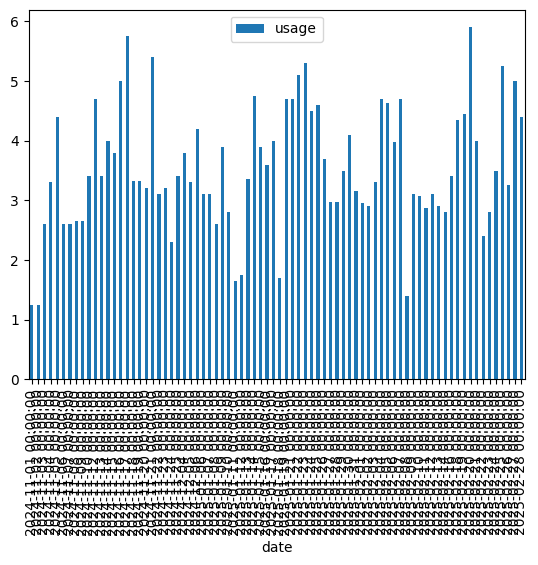

In [11]:
# fun plot to see usage by date
dately_usage = clean_inventory_df.groupby("date")["usage"].sum().to_frame()
dately_usage.plot(kind="bar")

### Clean Weather Data

In [ ]:
# import weather data
temp_df = pd.read_csv("data/weather_data_1101-0228.csv")
rain_guage_df = pd.read_csv("data/rain_gauge_data_1101-0228.csv")

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_28988\4030231400.py:2: DtypeWarning: Columns (0,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv("weather_data_1101-0228.csv")
C:\Users\Yvonne\AppData\Local\Temp\ipykernel_28988\4030231400.py:3: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  rain_guage_df = pd.read_csv("rain_gauge_data_1101-0228.csv")


In [13]:
def clean_temp_df(df, columns=["Date", "Time", "Temperature"]):
    """
    This function takes in the dataframe to clean and a list of columns to be set
    (default = ["Date", "Time", "Temperature"]). It returns the dataframe with
    the correct columns and values.
    """
    # change column headers to first row
    new_df_list = []

    for i in range(len(df)):
        new_df_list.append(list(df.iloc[i].name))

    trim_temp_df = pd.DataFrame(new_df_list[1:], columns=new_df_list[0])
    trim_temp_df = trim_temp_df[columns]

    return trim_temp_df

In [14]:
def clean_rain_df(df, columns=["Date", "Time", "Rain"]):
    """
    This function takes in the dataframe to clean and a list of columns to be set
    (default = ["Date", "Time", "Rain"]). It returns the dataframe with the correct
    columns and values.
    """
    # change column headers to first row
    df.columns = ["Rain"]
    new_df_list = []

    for i in range(len(df)):
        this_row = list(df.iloc[i].name)
        this_row.append(df.iloc[i]["Rain"])
        new_df_list.append(this_row)

    trim_rain_df = pd.DataFrame(new_df_list[1:], columns=new_df_list[0])
    trim_rain_df = trim_rain_df[columns]

    return trim_rain_df

In [15]:
def clean_weather_step2(df, columns, open_hours=["18", "19", "20"], groupby_method="mean"):
    """
    This function takes in the weather dataframe to clean, list of column names,
    list of open hours (default = ["18", "19", "20"]), and a string representation
    of the way the data should be calculated (default = "mean"). It further cleans
    the weather dataframe by changing the date and time to datetime format, select
    and calculate (either mean or sum) the values within the open hours. It returns
    the cleaned dataframe.
    """
    # time to time object
    df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.strftime('%H:%M')

    # between 6 and 9
    mask = df["Time"].str[:2].isin(open_hours)
    open_hr_df = df[mask]

    # find mean or sum of the day
    thing_we_need = columns[2]
    open_hr_df.loc[:, thing_we_need] = pd.to_numeric(open_hr_df[thing_we_need], errors='coerce')
    if groupby_method == "mean":
        open_hr_sum_df = open_hr_df.groupby("Date")[thing_we_need].mean().to_frame()
    elif groupby_method == "sum":
        open_hr_sum_df = open_hr_df.groupby("Date")[thing_we_need].sum().to_frame()

    # to datetime
    open_hr_sum_df.index = pd.to_datetime(open_hr_sum_df.index, format="%Y-%m-%d")

    return open_hr_sum_df

In [16]:
temp_columns = ["Date", "Time", "Temperature"]

open_hr_sum_temp_df = clean_weather_step2(clean_temp_df(temp_df), temp_columns)
open_hr_sum_temp_df

,Temperature
Date,
2024-11-01,49.127778
2024-11-02,50.816111
2024-11-03,51.297222
2024-11-04,52.321111
2024-11-05,50.837778
...,...
2025-02-24,47.588333
2025-02-25,49.917778
2025-02-26,53.077222


In [17]:
rain_columns = ["Date", "Time", "Rain"]
open_hr_sum_rain_df = clean_weather_step2(clean_rain_df(rain_guage_df), rain_columns, groupby_method="sum")

# rain -> if > 0 == True
open_hr_sum_rain_df["isRain"] = np.where(open_hr_sum_rain_df["Rain"] > 0, True, False)

open_hr_sum_rain_df

,Rain,isRain
Date,,
2024-11-01,0.06,True
2024-11-02,0.0,False
2024-11-03,0.0,False
2024-11-04,0.0,False
2024-11-05,0.08,True
...,...,...
2025-02-24,0.09,True
2025-02-25,0.0,False
2025-02-26,0.0,False


### Clean Customers Count Data

In [ ]:
#import customer count data
customer_count_df = pd.read_csv("data/Customer_Count_Date.csv")

customer_count_df

,Date,Customer count
0,11/1/2024,115
1,11/2/2024,101
2,11/3/2024,127
3,11/4/2024,153
4,11/5/2024,?
...,...,...
86,2/24/2025,104
87,2/25/2025,137
88,2/26/2025,148
89,2/27/2025,206


In [19]:
def clean_customer_df(df):
    """
    This function takes in the customer count dataframe to clean. It changes
    the date to datetime formate, remove invalid and problematic (count < 10)
    entries. It returns the cleaned dataframe.
    """
    df.columns = ["date", "customer_count"]

    # date to datetime format
    df["date"] = pd.to_datetime(df['date'], format="%m/%d/%Y")

    # replace invalid values and change numbers to numeric
    df["customer_count"] = df["customer_count"].replace(["CLOSED", "?", "Closed"], np.nan)

    df["customer_count"] = pd.to_numeric(df["customer_count"])

    # remove problematic inputs (count < 10)
    df.loc[df["customer_count"] < 10, "customer_count"] = np.nan

    # set date as index
    df.set_index("date", inplace=True)

    return df

In [20]:
customer_count_df = clean_customer_df(customer_count_df)

customer_count_df

,customer_count
date,
2024-11-01,115.0
2024-11-02,101.0
2024-11-03,127.0
2024-11-04,153.0
2024-11-05,NaN
...,...
2025-02-24,104.0
2025-02-25,137.0
2025-02-26,148.0


### Make a Merged df

In [21]:
# create a merged dataframe to store all the data
# ["Date", "Day of the Week", "Ice Cream Usage", "Customer Count", "Temperature", "Rained"]
merged_df = pd.DataFrame()

# add Date column from inventory df
merged_df["Date"] = clean_inventory_df.index.get_level_values("date").unique()

# add day of the week
merged_df["Day of the Week"] = merged_df["Date"].dt.dayofweek
replacement = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
merged_df["Day of the Week"] = merged_df["Day of the Week"].replace(replacement).to_frame()
cat_type = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
merged_df["Day of the Week"] = merged_df["Day of the Week"].astype(cat_type)

# add usage
usage_sum = clean_inventory_df.groupby("date")["usage"].sum().to_frame()
merged_df = pd.merge(merged_df, usage_sum, left_on="Date", right_on="date", how="left")
merged_df = merged_df.rename(columns={"usage": "Usage"})

# add customers count
merged_df = pd.merge(merged_df, customer_count_df["customer_count"], left_on="Date", right_index=True, how="left")
merged_df = merged_df.rename(columns={"customer_count": "Customer Count"})

# add temp
merged_df = pd.merge(merged_df, open_hr_sum_temp_df, left_on="Date", right_index=True, how="left")
merged_df["Temperature"] = pd.to_numeric(merged_df["Temperature"], errors="coerce")

# add rain
merged_df = pd.merge(merged_df, open_hr_sum_rain_df["isRain"], left_on="Date", right_index=True, how="left")
merged_df = merged_df.rename(columns={"isRain": "Rained?"})

merged_df

,Date,Day of the Week,Usage,Customer Count,Temperature,Rained?
0,2024-11-01,Friday,1.25,115.0,49.127778,True
1,2024-11-02,Saturday,1.25,101.0,50.816111,False
2,2024-11-03,Sunday,2.60,127.0,51.297222,False
3,2024-11-04,Monday,3.30,153.0,52.321111,False
4,2024-11-05,Tuesday,4.40,NaN,50.837778,True
...,...,...,...,...,...,...
73,2025-02-24,Monday,3.50,104.0,47.588333,True
74,2025-02-25,Tuesday,5.25,137.0,49.917778,False
75,2025-02-26,Wednesday,3.25,148.0,53.077222,False
76,2025-02-27,Thursday,5.00,206.0,59.800556,False


## Results

### 1. How does the weather or temperature ice cream usage and the number of customers?

In [22]:
# function for finding correlation between two continuous variables
def corr_continuous(df, var1, var2):
    """
    This function prints the Pearson r between the two given variables and
    returns an Axes object of a scatter plot with regression line between two
    variables of the given dataset.
    df: DataFrame
    var1: string
    var2: string
    """
    r = df[var1].corr(df[var2])
    print("Pearson r between " + var1 + " and " + var2 + ": " + str(r))
    ax = sns.lmplot(data=df, x=var1, y=var2)
    return ax

In [23]:
# function for finding correlation between two continuous variables, stratified by day of the week
def corr_continuous_sep(df, var1, var2):
    """
    This function stratifies data into different days of the week. It prints out
    the Pearson r between the two given variables each day of the week, and
    returns an Axes object of a scatter plot with regression lines between two
    variables with colors seperating different days of the week.
    df: DataFrame
    var1: string representation of the variable on the x axis
    var2: string representation of the variable on the y axis
    """
    for day in df["Day of the Week"].cat.categories:
        data_that_day = df[df["Day of the Week"] == day]
        r = data_that_day[var1].corr(data_that_day[var2])
        print("Correlation of " + str(day) + ": " + str(r))

    ax = sns.lmplot(data=df, x=var1, y=var2, hue="Day of the Week")
    return ax

In [24]:
def corr_cont_binary(df, var1, var2):
    """
    This function prints the spearman's rho between the two given variables and
    returns an Axes object of a box plot for the variables of the given dataset.
    df: DataFrame
    var1: string representation of the binary variable
    var2: string representation of the continuous variable
    """
    spearmans_rho = df[var1].corr(df[var2], method="spearman")
    print("Spearman's rho between " + var1 + " and " + var2 + ": " + str(spearmans_rho))
    ax = sns.catplot(data=df, x=var1, y=var2, kind="box")
    return ax

First, I plotted and calculated Pearson r between temperature and ice cream usage. I found no correlation between those two variables, which was unexpected. 

Pearson r between Temperature and Usage: -0.009785315504552047


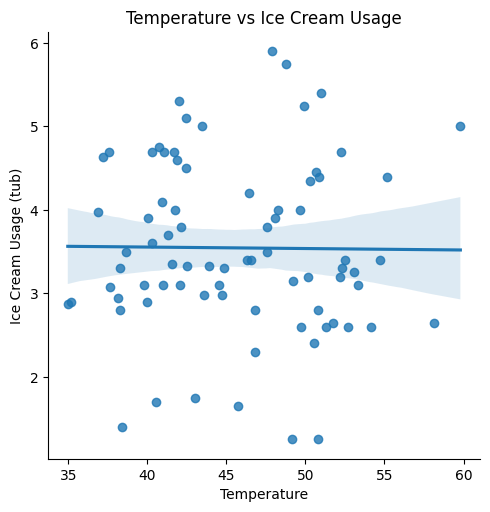

In [25]:
# plot for temp and usage
ax = corr_continuous(merged_df, "Temperature", "Usage")
ax.set(ylabel="Ice Cream Usage (tub)", title="Temperature vs Ice Cream Usage")

I wondered if the lack of correlation was because which day of the week was a greater effect on ice cream usage, so I stratified the data by days of the week, but there was still no correlation.

Correlation of Monday: 0.30179075530257926
Correlation of Tuesday: 0.4808828219805039
Correlation of Wednesday: -0.47023422419234856
Correlation of Thursday: 0.21526222610295928
Correlation of Friday: -0.3070200664535273
Correlation of Saturday: -0.10724822702441511
Correlation of Sunday: 0.04518707039189744


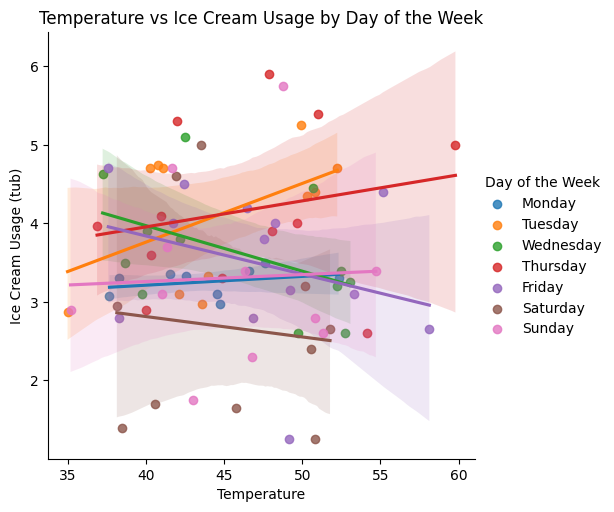

In [26]:
# stratify by day of the week
ax = corr_continuous_sep(merged_df, "Temperature", "Usage")
ax.set(ylabel="Ice Cream Usage (tub)", title="Temperature vs Ice Cream Usage by Day of the Week")

I then plotted, compared, and calculated Spearman's rho between whether it rained and ice cream usage. I found no different and no correlation.

Spearman's rho between Rained? and Usage: -0.0345663485219086


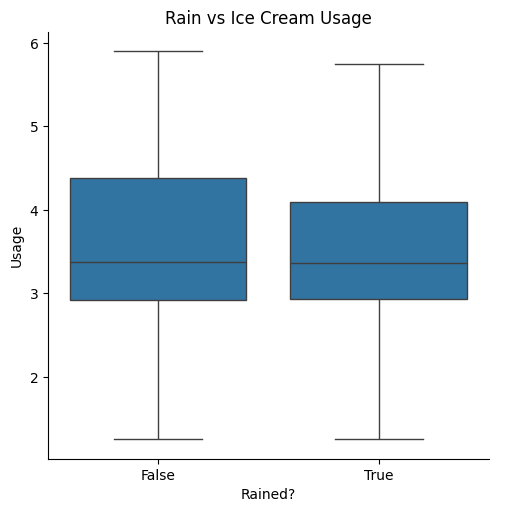

In [27]:
# plot for rain and usage
ax = corr_cont_binary(merged_df, "Rained?", "Usage")
ax.set(title="Rain vs Ice Cream Usage")

I went on and plotted the temperature and customers count. I found a moderate positive correlation (r=0.4) between those two vairables. 

Pearson r between Temperature and Customer Count: 0.4356764495912088


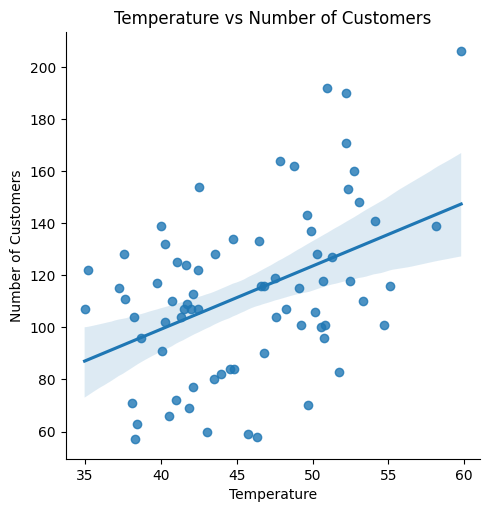

In [28]:
# plot between temp and customer count
ax = corr_continuous(merged_df, "Temperature", "Customer Count")
ax.set(ylabel="Number of Customers", title="Temperature vs Number of Customers")

Same as what I did with temperature and ice cream usage, I stratified the data by days of the week. Some days (Tuesdays, Thursdays, and Saturdays) have more correlation, and other days (Sundays) have less. 

Correlation of Monday: 0.37549605005574516
Correlation of Tuesday: 0.6804903236508465
Correlation of Wednesday: 0.5466514744566562
Correlation of Thursday: 0.6851782301267657
Correlation of Friday: 0.3841182508031934
Correlation of Saturday: 0.7740372164446271
Correlation of Sunday: 0.12377277580427368


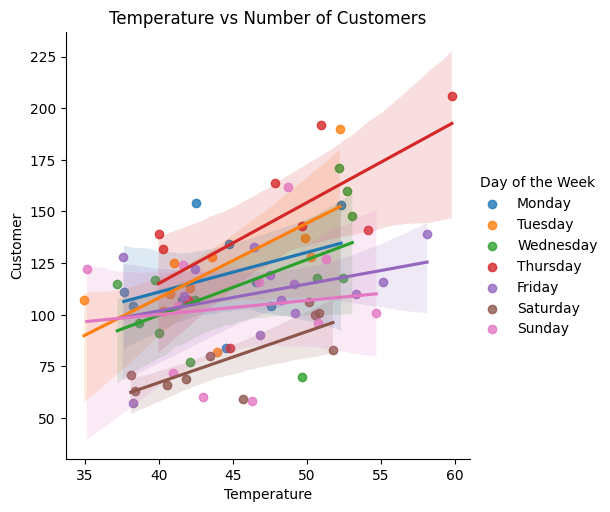

In [29]:
ax = corr_continuous_sep(merged_df, "Temperature", "Customer Count")
ax.set(ylabel="Customer", title="Temperature vs Number of Customers")

**Hypothesis testing**

Since there was correlation between temperature and customers count, I conducted a t-test to examine is the difference was significant. I seperated the dataset into two groups based on if it's above or below the median temperature for this test.

Null Hypothesis: the temperature has no effect on the number of customers\
Alternative Hypothesis: the temperature has an effect on the number of customers\
alpha level = 0.05

The p-value was under 0.05, which means that the result is significant! Since there is a positive correlation between those two variables, we can say that higher temerature brings in more customers for us. 

In [30]:
# hypothesis testing
median_temp = merged_df["Temperature"].median()

cold_day_group = merged_df[merged_df["Temperature"] < median_temp]["Customer Count"]
cold_day_group = cold_day_group.dropna()
warm_day_group = merged_df[merged_df["Temperature"] > median_temp]["Customer Count"]
warm_day_group = warm_day_group.dropna()

t_stats, p_value = stats.ttest_ind(cold_day_group, warm_day_group)
print("t stats: " + str(t_stats) + "\np-value: " + str(p_value))

if p_value < 0.05:
    print("The temperature has a significant effect on the number of customers.")
else:
    print("There is not enough evidence to suggest an effect of temerature on customer count.")

t stats: -3.179044539024274
p-value: 0.002178872188529118
The temperature has a significant effect on the number of customers.


However, rain doesn't seem to have an effect on the number of customers we have. 

Spearman's rho between Rained? and Customer Count: -0.08185940680868235


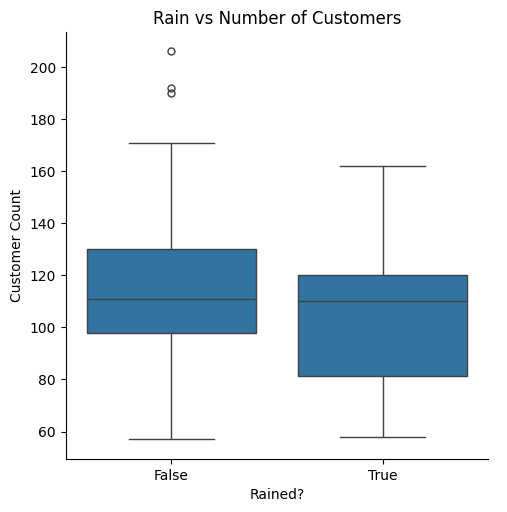

In [31]:
# plot for rain and customer count
ax = corr_cont_binary(merged_df, "Rained?", "Customer Count")
ax.set(title="Rain vs Number of Customers")

The lack of correlation between temperature/weather and ice cream usage was unexpected. This may be because of several factors: we have different sizes that use up different amounts of ice cream, different volunteers may give out slightly different portions, and different flavors have different difficulties of scooping them.\
Whether it rained or not did not affect ice cream usage or customer count was another surprising result. I examined the dataset and found that only 16 of the 78 days had rain, which seems inaccurate. There might be better ways or better records of whether it rained or not. 

In [32]:
print("Days that rained: " + str(len(merged_df[merged_df["Rained?"] == True])))
print("Total days: " + str(len(merged_df)))

Days that rained: 16
Total days: 78


### 2. What ice cream flavors are the most popular?

Since our ice cream flavor rotates and appeared different number of times throughout time that data is collected for this project, I define the popularity of the flavors as the average usage per night. I plotted the 8 most popular and 8 least popular flavors because we have 8 flavors on shelf at a time. 

The 8 most popular flavors are: Chocolate Chip Cookie Dough, Salted Caramel Brownie Chocolate, Dawg Tracks, Cookies & Cream, Mint Chocolate Chip, Mocha Almond Fudge, Strawberry Cheesecake, and Huckleberry.\
The 8 least popular flavors are: Coconut Toasted Pineapple, Orange Sherbet, Vanilla Bean, Pistachio Almond, Caramel Butter Pecan, Wildberry, Ube, Rainbow Sherbet

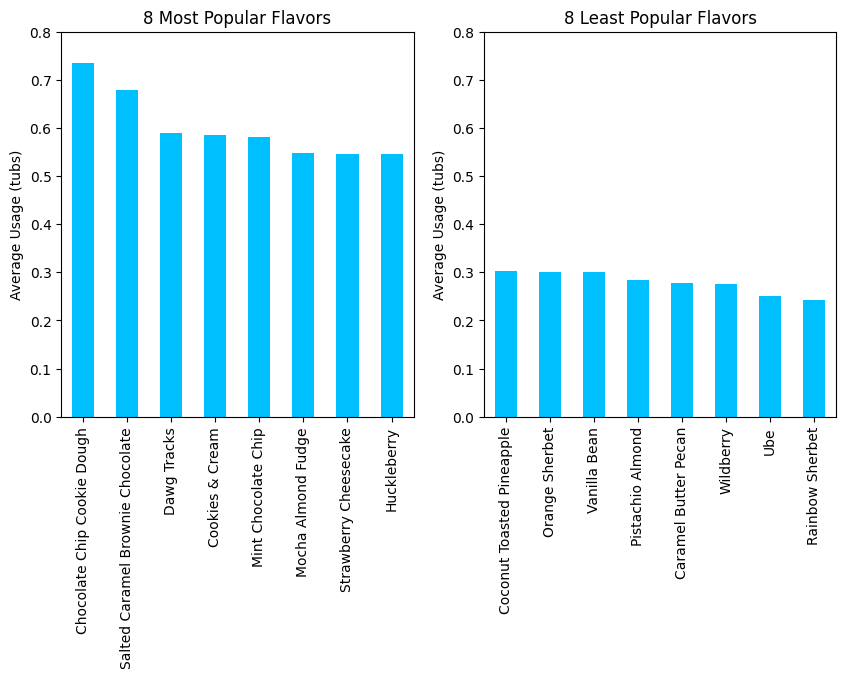

In [33]:
ave_flavor_usage = clean_inventory_df.groupby("flavor")["usage"].mean()
ave_flavor_usage = ave_flavor_usage.sort_values(ascending=False)

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

# bar plot for 8 most pop flavors
ave_flavor_usage.head(8).plot(ax=ax1, kind="bar", color="deepskyblue")
ax1.set_title("8 Most Popular Flavors")

# and bar plot for least pop flavors
ave_flavor_usage.tail(8).plot(ax=ax2, kind="bar", color="deepskyblue")
ax2.set_title("8 Least Popular Flavors")

for ax in [ax1, ax2]:
    ax.set(ylim=(0, 0.8), ylabel="Average Usage (tubs)", xlabel=None)

### 3. Is there a day of the week that we have the most customers?


To answer this question, I plotted the average customer counts of each day of the week. 

We have the most customers on Thursdays, and we tend to have more customers on weekdays than weekends. This result aligns with our observations. 

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_28988\3273043195.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ave_cust_by_weekday = merged_df.groupby("Day of the Week")["Customer Count"].mean()


<Axes: xlabel='Day of the Week', ylabel='Average Customer Count'>

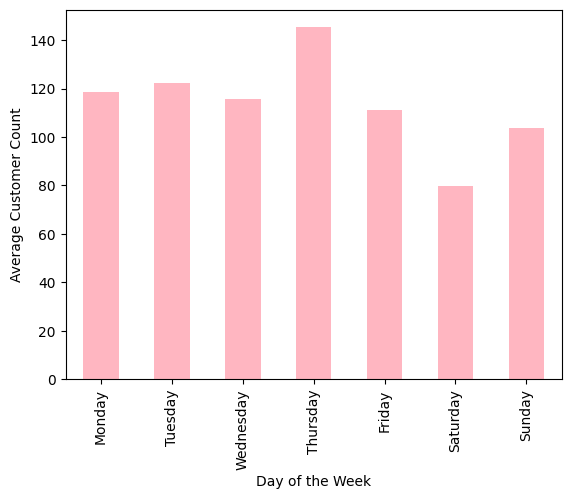

In [ ]:
# bar plot days of the week vs ave usage
ave_cust_by_weekday = merged_df.groupby("Day of the Week")["Customer Count"].mean()

ave_cust_by_weekday.plot(kind="bar", color="lightpink", ylabel="Average Customer Count")

### 4. Does the existence of very popular flavors affect sales of other flavors?

To answer this questions, I conducted a one way ANOVA testing. Split the data into two groups: one group that contains at least one popular flavor, and another group that does not contain any popular flavors. Popular flavor is defined as the top 3 flavors based on daily average ice cream usage (Chocolate Chip Cookie Dough, Salted Caramel Brownie Chocolate, and Dawg Tacks). I chose the top three because that would most evenly divide the dataset. 

Null hypothesis: the average usage of non-popular flavors when a popular flavor exists is the same as when a popular flavor doesn't exist.\
Alternative hypothesis: the average usage of non-popular flavors when a popular flavor exists is not the same as when a popular flavor doesn't exist.

The p-value turned out to be 0.46, way above 0.05. There is no enough evidence to show that the presence of a very popular flavor has an effect on the average usage of the other flavors. 

In [35]:
# choose top 3 popular flavors (out of 30)
pop_flavors = clean_inventory_df.groupby("flavor")["usage"].mean().sort_values(ascending=False).head(3).index

pop_flavors

Index(['Chocolate Chip Cookie Dough', 'Salted Caramel Brownie Chocolate',
       'Dawg Tracks'],
      dtype='object', name='flavor')

In [36]:
def contains_pop(date, pop_flavors, df):
    """
    This function takes in a datetime object, a list of pop_flavors, and the
    inventory dataframe. It returns 1 if the flavors that day contains at least
    one popular flavor and 0 otherwise.
    """
    flavors_that_day = df.loc[date].index
    return 1 if any(item in flavors_that_day for item in pop_flavors) else 0

def ave_other_usage(date, pop_flavors, df):
    """
    This function takes in a datetime object, a list of pop_flavors, and the
    inventory dataframe. It returns the average usage of the flavors other than
    the popular flavor(s) that day.
    """
    day_df = df.loc[date]
    filtered_day_df = day_df[~day_df.index.isin(pop_flavors)]
    return filtered_day_df["usage"].mean()

In [37]:
# make a df that contains dates, whether or not contains pop flavor, ave usage of other flavors
pop_or_not_df = pd.DataFrame()

pop_or_not_df["Date"] = clean_inventory_df.index.get_level_values("date").unique()

pop_or_not_df["Contains Pop"] = pop_or_not_df["Date"].apply(lambda date: contains_pop(date, pop_flavors, clean_inventory_df))

pop_or_not_df["Ave Other Usage"] = pop_or_not_df["Date"].apply(lambda date: ave_other_usage(date, pop_flavors, clean_inventory_df))

pop_or_not_df

,Date,Contains Pop,Ave Other Usage
0,2024-11-01,0,0.156250
1,2024-11-02,0,0.156250
2,2024-11-03,1,0.357143
3,2024-11-04,1,0.414286
4,2024-11-05,1,0.400000
...,...,...,...
73,2025-02-24,1,0.428571
74,2025-02-25,1,0.664286
75,2025-02-26,1,0.407143
76,2025-02-27,1,0.614286


In [38]:
with_pop_group = pop_or_not_df.loc[pop_or_not_df["Contains Pop"] == 1]["Ave Other Usage"]
without_pop_group = pop_or_not_df.loc[pop_or_not_df["Contains Pop"] == 0]["Ave Other Usage"]

f_stats, p_value = stats.f_oneway(with_pop_group, without_pop_group)
print("f stats: " + str(f_stats) + "\np-value: " + str(p_value))

if p_value < 0.05:
    print("The presence of a popular flavor affects other flavors' usage.")
else:
    print("There is not enough evidence to suggest an effect of the presence of a popular flavor on other flavors' usage.")

f stats: 0.547999508162395
p-value: 0.4614170744809055
There is not enough evidence to suggest an effect of the presence of a popular flavor on other flavors' usage.


## Implications and Limitations

Through my analysis, the Frost Bite management and leadership team can be benefitted from my analysis since this gives us insight in trends and factors that may influence our sales. We can use these information to make decisions on operations and marketing strategies. However, if we rely on the results of this analysis too much, some customers (such as those who like a specific "non-popular" flavor or those who come on less busy days) may be excluded or harmed by our decisions. For example, if we decided to stock ice cream soley based on the popularity found here, a customer who loves Coconut Toasted Pineapple (the 8th least popular flavor) might never get to order that from us anymore. 

There are some limitations of my analysis. First of all, the time frame for this anaylsis was very short. I only got data for less than four months and it only covers some of fall and winter. Secondly, my inventory and customer count data was recorded manually, and there are some missing data and may contain errors or assumptions when recording. When considering the popularity of a flavor, I defined it as the average usage of the flavor on all the days it was on shelf, which is not the best or only way to define popularity. Another shortcoming in this analysis was that I was not able to obtain our daily revenue data, which could give us more insight, especially in a business's perspective. Lastly, there are several other factors that can influence ice cream usage or customer visits, such as holidays, events, time of the quarter, etc. Customer behavior is not fully captured by the data used. 

In the future, I hope to continue collecting those data and conduct a more complete analysis at the end of the year. With daily revenue data what has recently become available and a longer timeframe, we would be able to gain insight in our business more comprehensively. 

# Testing

Below are test cases for more conplex functions.

### Cleaning Inventory Data

In [ ]:
inventory_test_df = pd.read_csv("data/CSE 163 FP Testing Cases - Sheet1.csv")

In [40]:
# test chunks_to_long function
inven_test1_df = chunks_to_long(inventory_test_df)

expected_data1 = {
    "date": ["11/3", "11/3", "11/3", "11/3", "11/3", "11/3", "11/3", "11/3",
             "11/4", "11/4"],
    "flavor": ["wildberry", "spumoni; butter pecan", "scbc", "tcp; cc", "rainbow",
               "rocky road", "mystery", "huckle", "wild", "butter p"],
    "usage": ["0.2", "0.1; 0.1", "0.1", "0.1; 0.9", "0.4", "0.7", "0.4", "0.6",
              "0.2", "0.2"]
}

expected_df1 = pd.DataFrame(expected_data1)

assert inven_test1_df.iloc[0:10].equals(expected_df1), "cleaned dfs did not match"

In [41]:
# test init_clean_long_inven_df
inven_test2_df = init_clean_long_inven_df(inven_test1_df, ["11/4"])

expected_data2 = {
    "date": ["11/3", "11/3", "11/3", "11/3", "11/3", "11/3", "11/3", "11/3",
             "11/5", "11/5"],
    "flavor": ["wildberry", "spumoni", "scbc", "tcp", "rainbow",
               "rocky road", "mystery", "huckle", "wild", "butter p"],
    "usage": ["0.2", "0.1", "0.1", "0.1", "0.4", "0.7", "0.4", "0.6", "0.5", "0.4"]
}
expected_data2["date"] = pd.to_datetime(["2024-" + d.replace("/", "-") for d in expected_data2["date"]])

expected_df2 = pd.DataFrame(expected_data2)

assert inven_test2_df.iloc[0:10].reset_index(drop=True).equals(expected_df2), "cleaned dfs did not match"

In [42]:
# test clean_flavor
inven_test3_df = clean_flavor(inven_test2_df, flavor_key, valid_flavors)

expected_data3 = {
    "date": ["11/3", "11/3", "11/3", "11/3", "11/3", "11/3", "11/3", "11/3",
             "11/5", "11/5"],
    "flavor": ["Wildberry", "Spumoni", "Salted Caramel Brownie Chocolate",
               "Coconut Toasted Pineapple", "Rainbow Sherbet",
               "Rocky Road", "Dark Chocolate Brownie Batter", "Huckleberry",
                "Wildberry", "Butter Pecan"],
    "usage": ["0.2", "0.1", "0.1", "0.1", "0.4", "0.7", "0.4", "0.6", "0.5", "0.4"]
}
expected_data3["date"] = pd.to_datetime(["2024-" + d.replace("/", "-") for d in expected_data3["date"]])

expected_df3 = pd.DataFrame(expected_data3)

assert inven_test3_df.iloc[0:10].reset_index(drop=True).equals(expected_df3), "cleaned dfs did not match"

In [43]:
# test split_two_day
inven_test4_df = split_two_day(inven_test3_df)

expected_data4 = {
    "date": ["11/8"] * 8 + ["11/9"] * 8,
    "flavor": [
        "Dawg Tracks", "Mocha Almond Fudge", "Butter Pecan", "Chocolate", "French Vanilla",
        "Pistachio Almond", "Rainbow Sherbet", "Salted Caramel",
        "Chocolate", "Salted Caramel", "French Vanilla", "Pistachio Almond",
        "Butter Pecan", "Mocha Almond Fudge", "Rainbow Sherbet", "Dawg Tracks"
    ],
    "usage": [0.35, 0.05, 0.35, 0.55, 0.55, 0.05, 0.15, 0.4, 0.55, 0.4, 0.55,
              0.05, 0.35, 0.05, 0.15, 0.35]
}

expected_data4["date"] = pd.to_datetime(["2024-" + d.replace("/", "-") for d in expected_data4["date"]])

expected_df4 = pd.DataFrame(expected_data4)

assert inven_test4_df.iloc[32:49].reset_index(drop=True).equals(expected_df4), "cleaned dfs did not match"

### Cleaning Weather Data

In [ ]:
temp_test_df = pd.read_csv("data/temp_test_data_feb.csv")
rain_test_df = pd.read_csv("data/rain_test_data_feb.csv")

In [45]:
# test clean_temp_df
temp_test1_df = clean_temp_df(temp_test_df)

assert temp_test1_df.columns.equals(pd.Index(['Date', 'Time', 'Temperature'])), "dataframe columns don't match"

In [46]:
# test clean_rain_df
rain_test1_df = clean_rain_df(rain_test_df)

assert rain_test1_df.columns.equals(pd.Index(['Date', 'Time', 'Rain'])), "dataframe columns don't match"

In [47]:
# test clean_weather_step2
temp_test2_df = clean_weather_step2(temp_test1_df, ['Date', 'Time', 'Temperature'])
rain_test2_df = clean_weather_step2(rain_test1_df, ['Date', 'Time', 'Rain'])

assert len(temp_test2_df) == 28, "dataframe length doesn't match"
assert len(rain_test2_df) == 28, "dataframe length doesn't match"

### Cleaning Customer Data

In [48]:
# test clean_customer_df
sample_cust_data = {
    "date": ["11/01/2024", "11/02/2024", "11/03/2024", "11/04/2024", "11/05/2024", "11/06/2024"],
    "customer_count": [80, "CLOSED", 5, 200, "?", 8]
}

sample_cust_df = pd.DataFrame(sample_cust_data)
result_df = clean_customer_df(sample_cust_df)

expected_data = {
    "date": ["11/01/2024", "11/02/2024", "11/03/2024", "11/04/2024", "11/05/2024", "11/06/2024"],
    "customer_count": [80, np.nan, np.nan, 200, np.nan, np.nan]
}

expected_df = pd.DataFrame(expected_data)
expected_df["date"] = pd.to_datetime(expected_df["date"], format="%m/%d/%Y")
expected_df.set_index("date", inplace=True)

assert result_df.equals(expected_df), "cleaned dataframes don't match"

C:\Users\Yvonne\AppData\Local\Temp\ipykernel_28988\4248780679.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["customer_count"] = df["customer_count"].replace(["CLOSED", "?", "Closed"], np.nan)


### Results Section

In [49]:
# test contains_pop
inven_test5_df = inven_test4_df.set_index(["date", "flavor"])

test_pop_flavor = ["Spumoni"]
assert contains_pop(pd.Timestamp("2024-11-03"), test_pop_flavor, inven_test5_df) == 1, "should contain popular flavor"
assert contains_pop(pd.Timestamp("2024-11-05"), test_pop_flavor, inven_test5_df) == 0, "should not contain popular flavor"

In [50]:
# test ave_other_usage
assert ave_other_usage(pd.Timestamp("2024-11-03"), test_pop_flavor, inven_test5_df) == 2.5 / 7

### Doctest

In [51]:
doctest.testmod()

TestResults(failed=0, attempted=2)